In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
input_size = 1
output_size = 1
learning_rate = 0.001

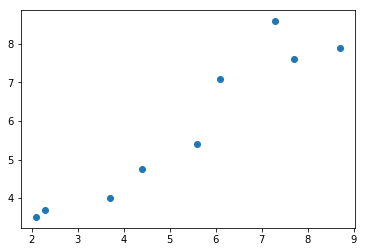

(9, 1)


In [3]:
xtrain = np.array([[2.3], [4.4], [3.7], [6.1], [7.3], [2.1], [5.6], [7.7], [8.7]], dtype=np.float32)
ytrain = np.array([[3.7], [4.76], [4.0], [7.1], [8.6], [3.5], [5.4], [7.6], [7.9]], dtype=np.float32)

plt.figure()
plt.scatter(xtrain, ytrain)
plt.show()
print(np.shape(xtrain))

In [4]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.liner = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.liner(x)
        return out

In [5]:
model = LinearRegression(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [6]:
num_epochs = 1000
# 注意, dtype一定要指定, 不然在train的过程中会报错
inputs = Variable(torch.from_numpy(xtrain))
targets = Variable(torch.from_numpy(ytrain))

for epoch in range(num_epochs):
    outputs = model(inputs)
    optimizer.zero_grad()    
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 ==0:
        print('Epoch [%d/%d], Lpss:%.4f'% (epoch+1, num_epochs, loss.data))

Epoch [50/1000], Lpss:1.0268
Epoch [100/1000], Lpss:0.9999
Epoch [150/1000], Lpss:0.9815
Epoch [200/1000], Lpss:0.9636
Epoch [250/1000], Lpss:0.9462
Epoch [300/1000], Lpss:0.9293
Epoch [350/1000], Lpss:0.9129
Epoch [400/1000], Lpss:0.8969
Epoch [450/1000], Lpss:0.8815
Epoch [500/1000], Lpss:0.8664
Epoch [550/1000], Lpss:0.8518
Epoch [600/1000], Lpss:0.8376
Epoch [650/1000], Lpss:0.8238
Epoch [700/1000], Lpss:0.8104
Epoch [750/1000], Lpss:0.7974
Epoch [800/1000], Lpss:0.7848
Epoch [850/1000], Lpss:0.7725
Epoch [900/1000], Lpss:0.7606
Epoch [950/1000], Lpss:0.7490
Epoch [1000/1000], Lpss:0.7378
